<a href="https://colab.research.google.com/github/mvoassis/enem2022/blob/main/Oficina_Intro_a_DS_com_dados_do_Enem_2022_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforme Dados em Conhecimento: Oficina de introdução a Data Science com dados do ENEM 2022

> Prof. Dr. Marcos Assis. (marcos.assis@ufpr.br)



# Base de dados

* Microdados do Enem 2022 - [Acesse aqui](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem.

> Utilizaremos dados amostrados (questão de agilidade), mas podem replicar com os dados completos posteriormente e avaliar os resultados (não devem mudar muito ;) )

* Dicionário dos dados:
* Dados amostrados: (Não precisa baixar os dados, vamos carregar direto do link)


In [2]:
import requests, zipfile, io
r = requests.get('https://dl.dropboxusercontent.com/s/qgwokkotdiob52b/MICRODADOS_ENEM_2022_reduzido.zip?dl=0')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content/")

# Pandas

A biblioteca pandas é uma poderosa ferramenta de análise de dados em Python. Ela fornece estruturas de dados flexíveis e eficientes, como o DataFrame, que permite manipular e analisar conjuntos de dados de forma intuitiva. Com o pandas, é possível realizar tarefas comuns de limpeza, transformação e manipulação de dados, além de executar operações estatísticas e de agregação. É uma biblioteca amplamente utilizada em ciência de dados e análise de dados.

Documentação da lib: https://pandas.pydata.org/docs/

> Carregando a biblioteca Pandas:

In [ ]:
import pandas as pd

## Carregando o arquivo 

Carregaremos o arquivo .csv para o formato DataFrame do Pandas.

> read_csv()

> head()

In [10]:
dados = pd.read_csv('/content/MICRODADOS_ENEM_2022_reduzido.csv', sep=';', encoding="ISO-8859-1")

dados.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,28812,210054954755,2022,1,F,1,1,1,4,0,...,A,A,A,B,A,A,B,A,B,B
1,800801,210057429109,2022,2,F,1,1,1,3,0,...,B,A,B,D,A,B,D,A,B,B
2,1485704,210055944093,2022,2,M,1,1,1,2,0,...,B,A,B,C,B,A,E,B,B,B
3,1233474,210057529343,2022,2,M,1,1,1,2,0,...,B,A,A,C,A,A,E,A,B,B
4,2414050,210056917855,2022,11,F,1,2,1,1,0,...,B,A,B,D,A,B,D,B,A,B


## Conhecendo os dados

Precisamos entender melhor nossos dados para poder entender se precisamos realizar algum pré-processamento.

> info()

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 77 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              500000 non-null  int64  
 1   NU_INSCRICAO            500000 non-null  int64  
 2   NU_ANO                  500000 non-null  int64  
 3   TP_FAIXA_ETARIA         500000 non-null  int64  
 4   TP_SEXO                 500000 non-null  object 
 5   TP_ESTADO_CIVIL         500000 non-null  int64  
 6   TP_COR_RACA             500000 non-null  int64  
 7   TP_NACIONALIDADE        500000 non-null  int64  
 8   TP_ST_CONCLUSAO         500000 non-null  int64  
 9   TP_ANO_CONCLUIU         500000 non-null  int64  
 10  TP_ESCOLA               500000 non-null  int64  
 11  TP_ENSINO               181929 non-null  float64
 12  IN_TREINEIRO            500000 non-null  int64  
 13  CO_MUNICIPIO_ESC        137026 non-null  float64
 14  NO_MUNICIPIO_ESC    

Vamos deletar a primeira coluna, que não faz sentido em nossa análise.

In [13]:
dados.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210054954755,2022,1,F,1,1,1,4,0,1,...,A,A,A,B,A,A,B,A,B,B
1,210057429109,2022,2,F,1,1,1,3,0,1,...,B,A,B,D,A,B,D,A,B,B
2,210055944093,2022,2,M,1,1,1,2,0,3,...,B,A,B,C,B,A,E,B,B,B
3,210057529343,2022,2,M,1,1,1,2,0,3,...,B,A,A,C,A,A,E,A,B,B
4,210056917855,2022,11,F,1,2,1,1,0,1,...,B,A,B,D,A,B,D,B,A,B


# Análises iniciais

### Dados dos participantes

* participação por faixa etária
* participação por sexo
* participação por cor/raça
* participação por tipo de escola do ensino médio
* proporção de treineiros

## Participação por faixa etária (TP_FAIXA_ETARIA)

> unique()

> map()

> value_counts()

Verificando quais os diferentes valores existem nesse campo do DataFrame.

In [5]:
dados['TP_FAIXA_ETARIA'].unique()

array([ 1,  2, 11, 12,  4,  6,  8,  3, 10, 14,  7,  5,  9, 17, 13, 15, 18,
       16, 20, 19])

Utilizando um dicionário python, vamos criar uma nova coluna em nosso dataframe que seja mais amigável para nossa análise.

In [6]:
dict_faixa_etaria = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos',
       }

In [7]:
dict_faixa_etaria[15]

'Entre 46 e 50 anos'

In [18]:
dados['TP_FAIXA_ETARIA_COMP'] = dados['TP_FAIXA_ETARIA'].map(dict_faixa_etaria)
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_FAIXA_ETARIA_COMP
0,210054954755,2022,1,F,1,1,1,4,0,1,...,A,A,B,A,A,B,A,B,B,Menor de 17 anos
1,210057429109,2022,2,F,1,1,1,3,0,1,...,A,B,D,A,B,D,A,B,B,17 anos
2,210055944093,2022,2,M,1,1,1,2,0,3,...,A,B,C,B,A,E,B,B,B,17 anos
3,210057529343,2022,2,M,1,1,1,2,0,3,...,A,A,C,A,A,E,A,B,B,17 anos
4,210056917855,2022,11,F,1,2,1,1,0,1,...,A,B,D,A,B,D,B,A,B,Entre 26 e 30 anos


Verificando quantos registros temos por idade

In [31]:
dados['TP_FAIXA_ETARIA_COMP'].value_counts(normalize=True)

18 anos               0.232068
17 anos               0.204928
19 anos               0.116720
Menor de 17 anos      0.087062
20 anos               0.071878
Entre 26 e 30 anos    0.054330
21 anos               0.047722
22 anos               0.035576
Entre 31 e 35 anos    0.029980
23 anos               0.026996
Entre 36 e 40 anos    0.021106
24 anos               0.021102
25 anos               0.017866
Entre 41 e 45 anos    0.014282
Entre 46 e 50 anos    0.008658
Entre 51 e 55 anos    0.005138
Entre 56 e 60 anos    0.002908
Entre 61 e 65 anos    0.001060
Entre 66 e 70 anos    0.000420
Maior de 70 anos      0.000200
Name: TP_FAIXA_ETARIA_COMP, dtype: float64

Visualizando os dados na forma de gráficos

<Axes: >

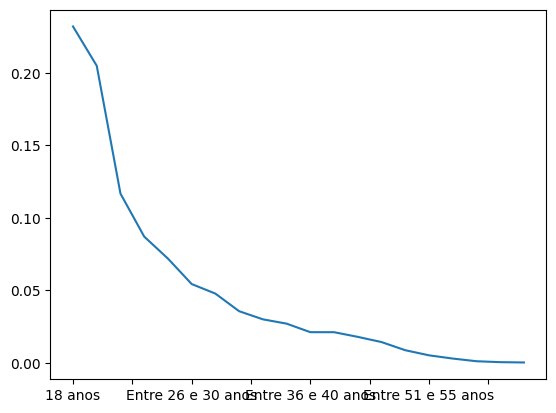

In [35]:
dados['TP_FAIXA_ETARIA_COMP'].value_counts(normalize=True).plot()

Plotando com a biblioteca *matplotlib*:

In [95]:
# Forma 1
porcentagem_por_idade = dados['TP_FAIXA_ETARIA_COMP'].value_counts(normalize=True).sort_index() * 100

In [97]:
# Forma 2
porcentagem_por_idade = dados['TP_FAIXA_ETARIA'].value_counts(normalize=True).sort_index(ascending=False) * 100
porcentagem_por_idade.index = porcentagem_por_idade.index.map(dict_faixa_etaria)
porcentagem_por_idade

Maior de 70 anos       0.0200
Entre 66 e 70 anos     0.0420
Entre 61 e 65 anos     0.1060
Entre 56 e 60 anos     0.2908
Entre 51 e 55 anos     0.5138
Entre 46 e 50 anos     0.8658
Entre 41 e 45 anos     1.4282
Entre 36 e 40 anos     2.1106
Entre 31 e 35 anos     2.9980
Entre 26 e 30 anos     5.4330
25 anos                1.7866
24 anos                2.1102
23 anos                2.6996
22 anos                3.5576
21 anos                4.7722
20 anos                7.1878
19 anos               11.6720
18 anos               23.2068
17 anos               20.4928
Menor de 17 anos       8.7062
Name: TP_FAIXA_ETARIA, dtype: float64

In [41]:
import matplotlib.pyplot as plt

In [78]:
def plota_grafico(dados_plot, titulo=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(15,5))
    plt.barh(dados_plot.index, dados_plot.values)
    if titulo!= None: 
        plt.title(titulo, fontsize=16)
    if titulo!= None:
        plt.xlabel(xlabel, fontsize=12)
    if titulo!= None:
        plt.ylabel(ylabel, fontsize=12)
    plt.show()

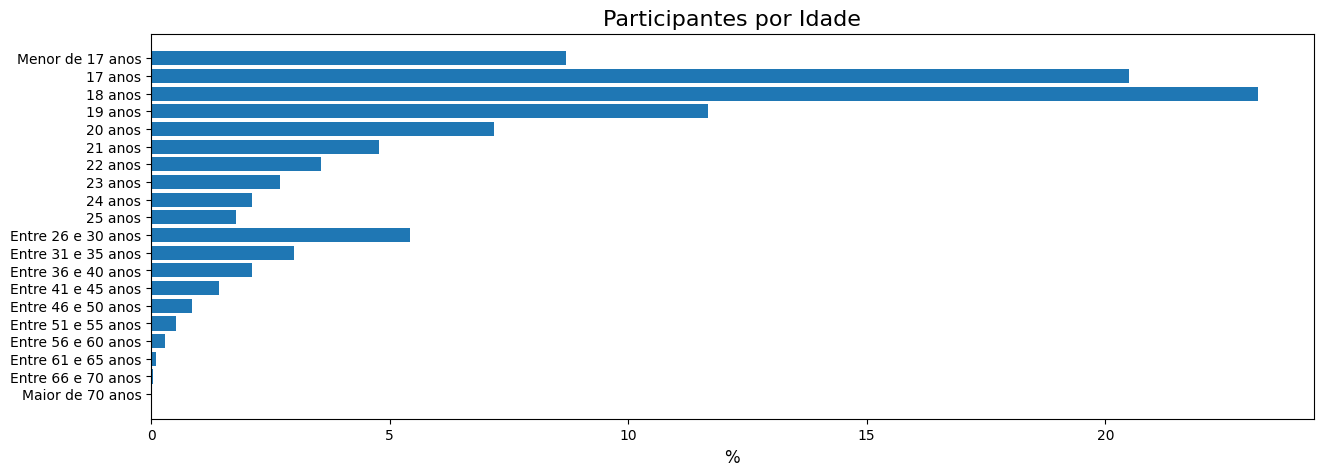

In [98]:
plota_grafico(porcentagem_por_idade, 'Participantes por Idade', '%')

## Participação por sexo (TP_SEXO)


In [100]:
dados['TP_SEXO'].value_counts()

F    305413
M    194587
Name: TP_SEXO, dtype: int64

In [101]:
porcentagem_por_sexo = dados['TP_SEXO'].value_counts(normalize=True).sort_index() * 100

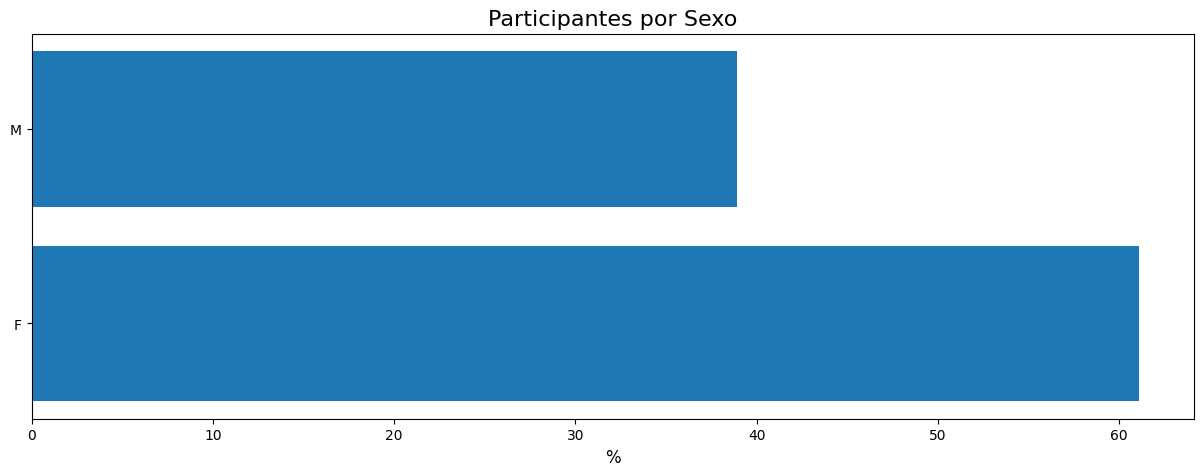

In [111]:
plota_grafico(porcentagem_por_sexo, 'Participantes por Sexo', '%')

## Participação por raça/cor (TP_COR_RACA)


Criando outra coluna com os dados não codificados, usando o map():


In [103]:
dict_raca_cor = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Não dispõe da informação',
       }

In [105]:
dados['TP_COR_RACA_COMP'] = dados['TP_COR_RACA'].map(dict_raca_cor)
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_FAIXA_ETARIA_COMP,TP_COR_RACA_COMP
0,210054954755,2022,1,F,1,1,1,4,0,1,...,A,B,A,A,B,A,B,B,Menor de 17 anos,Branca
1,210057429109,2022,2,F,1,1,1,3,0,1,...,B,D,A,B,D,A,B,B,17 anos,Branca
2,210055944093,2022,2,M,1,1,1,2,0,3,...,B,C,B,A,E,B,B,B,17 anos,Branca
3,210057529343,2022,2,M,1,1,1,2,0,3,...,A,C,A,A,E,A,B,B,17 anos,Branca
4,210056917855,2022,11,F,1,2,1,1,0,1,...,B,D,A,B,D,B,A,B,Entre 26 e 30 anos,Preta


Calculando a porcentagem por raça/cor, utilizando value_counts():

In [122]:
porcentagem_por_raca_cor = dados['TP_COR_RACA_COMP'].value_counts(normalize=True, ascending=True) * 100
porcentagem_por_raca_cor

Indígena          0.5548
Não declarado     1.8726
Amarela           1.9350
Preta            11.6974
Branca           41.1512
Parda            42.7890
Name: TP_COR_RACA_COMP, dtype: float64

Plotando o gráfico para visualizar os dados:

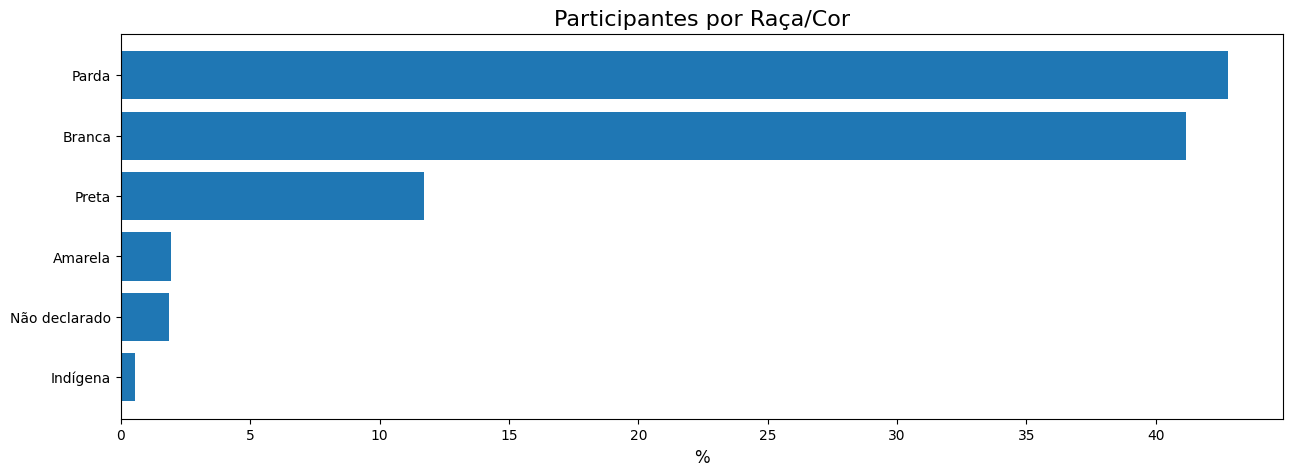

In [123]:
plota_grafico(porcentagem_por_raca_cor, 'Participantes por Raça/Cor', '%')

## Participação por Tipo de Escola no Ensino Médio (TP_ESCOLA)

Mesmos passos...

In [113]:
dict_tipo_escola_em = {
    1: 'Não respondeu',
    2: 'Pública',
    3: 'Privada',
       }


In [115]:
dados['TP_ESCOLA_COMP'] = dados['TP_ESCOLA'].map(dict_tipo_escola_em)
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_FAIXA_ETARIA_COMP,TP_COR_RACA_COMP,TP_ESCOLA_COMP
0,210054954755,2022,1,F,1,1,1,4,0,1,...,B,A,A,B,A,B,B,Menor de 17 anos,Branca,Não respondeu
1,210057429109,2022,2,F,1,1,1,3,0,1,...,D,A,B,D,A,B,B,17 anos,Branca,Não respondeu
2,210055944093,2022,2,M,1,1,1,2,0,3,...,C,B,A,E,B,B,B,17 anos,Branca,Privada
3,210057529343,2022,2,M,1,1,1,2,0,3,...,C,A,A,E,A,B,B,17 anos,Branca,Privada
4,210056917855,2022,11,F,1,2,1,1,0,1,...,D,A,B,D,B,A,B,Entre 26 e 30 anos,Preta,Não respondeu


In [124]:
porcentagem_por_tipo_escola = dados['TP_ESCOLA_COMP'].value_counts(normalize=True, ascending=True) * 100
porcentagem_por_tipo_escola

Privada           6.0776
Pública          31.9198
Não respondeu    62.0026
Name: TP_ESCOLA_COMP, dtype: float64

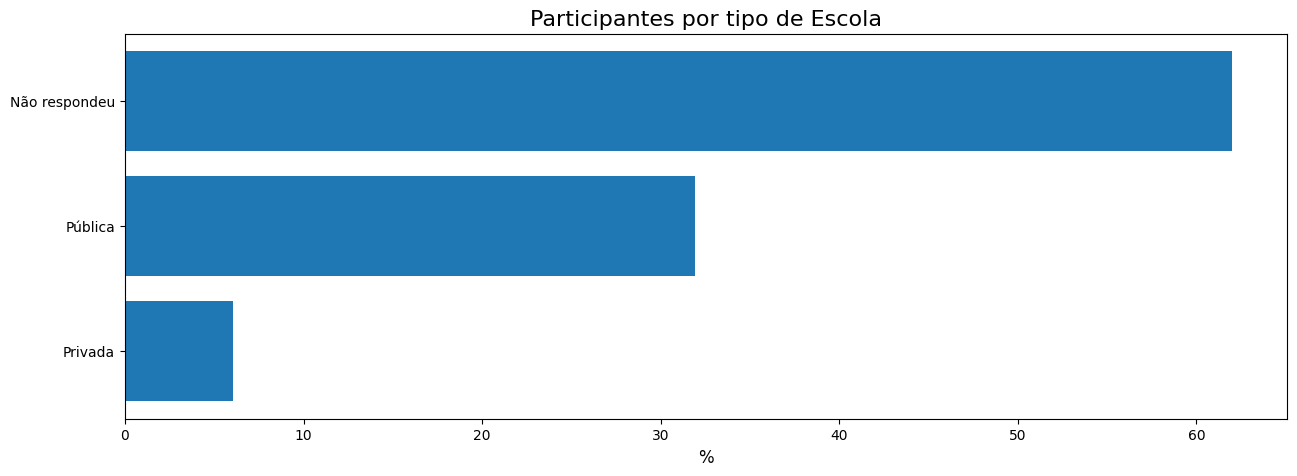

In [125]:
plota_grafico(porcentagem_por_tipo_escola, 'Participantes por tipo de Escola', '%')

## Participação de Treineiros (IN_TREINEIRO)


In [131]:
contagem_treineiros = dados['IN_TREINEIRO'].value_counts(normalize=True)*100

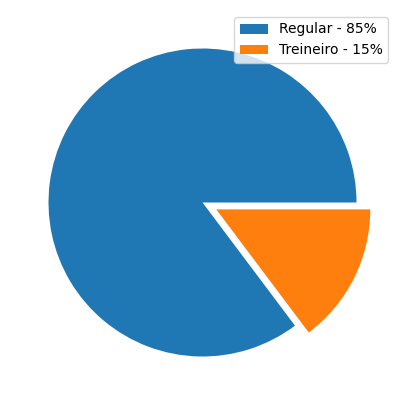

In [146]:
plt.figure(figsize=(5,5))
plt.pie(contagem_treineiros, explode=[0, 0.1])
plt.legend([f'Regular - {round(contagem_treineiros[0])}%', 
            f'Treineiro - {round(contagem_treineiros[1])}%'])
plt.show()

# Análises de Notas

Levando em conta Matemática ('NU_NOTA_MT')

> Estatísticas Descritivas
* Estatísticas por Estado
* Estatisticas por Tipo de Escola no Ensino médio
* Estatisticas por renda mensal da família
* Estatisticas para quem possui ou não computador em casa. 




## Notas de Matemática por Estado (SG_UF_ESC)

> groupby()

> describe()


Primeiro, vamos agrupar os dados por Estado utilizando a função groupby():

In [147]:
dados.groupby('SG_UF_ESC')

Este comando vai agrupar os dados do nosso DataFrame com base nos diferentes valores de Estado. 

Em seguida, vamos selecionar apenas a coluna de notas em matemática (que é o que nos interessa)

In [148]:
dados.groupby('SG_UF_ESC')['NU_NOTA_MT']

Por fim, podemos gerar estatísticas descritivas das informações selecionadas com diversos comandos, como:

* mean (média)
* count (contagem)
* std (desvio padrão)

Ou, como é nosso caso, podemos gerar uma visão resumida de todas essas informações de uma vez, no formato de um DataFrame, utilizando a função describe():

In [149]:
dados.groupby('SG_UF_ESC')['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
SG_UF_ESC,,,,,,,,
AC,430.0,508.174884,95.449033,353.7,430.625,501.40,571.175,773.0
AL,1639.0,528.054423,112.479697,0.0,436.500,515.30,606.250,908.1
AM,2016.0,492.724702,99.569181,0.0,415.350,475.05,557.125,896.7
AP,435.0,495.872414,95.495104,341.7,422.400,476.60,559.300,888.0
BA,4726.0,531.762844,110.448665,0.0,441.950,519.55,610.600,948.7
CE,10317.0,506.310439,108.055568,0.0,421.100,483.30,575.500,973.8
DF,2332.0,561.380274,117.068657,0.0,469.400,553.50,640.325,983.2
ES,2160.0,563.273009,118.644690,339.1,468.300,558.65,647.075,985.7
GO,3982.0,537.347740,114.212645,338.0,443.900,526.10,618.800,946.2


Por mais que os dados estejam aí, como são muitos, as vezes avaliar uma tabela pode ser complicado. Por isso, vamos utilizar um outro tipo de gráfico, chamado **boxplot**.



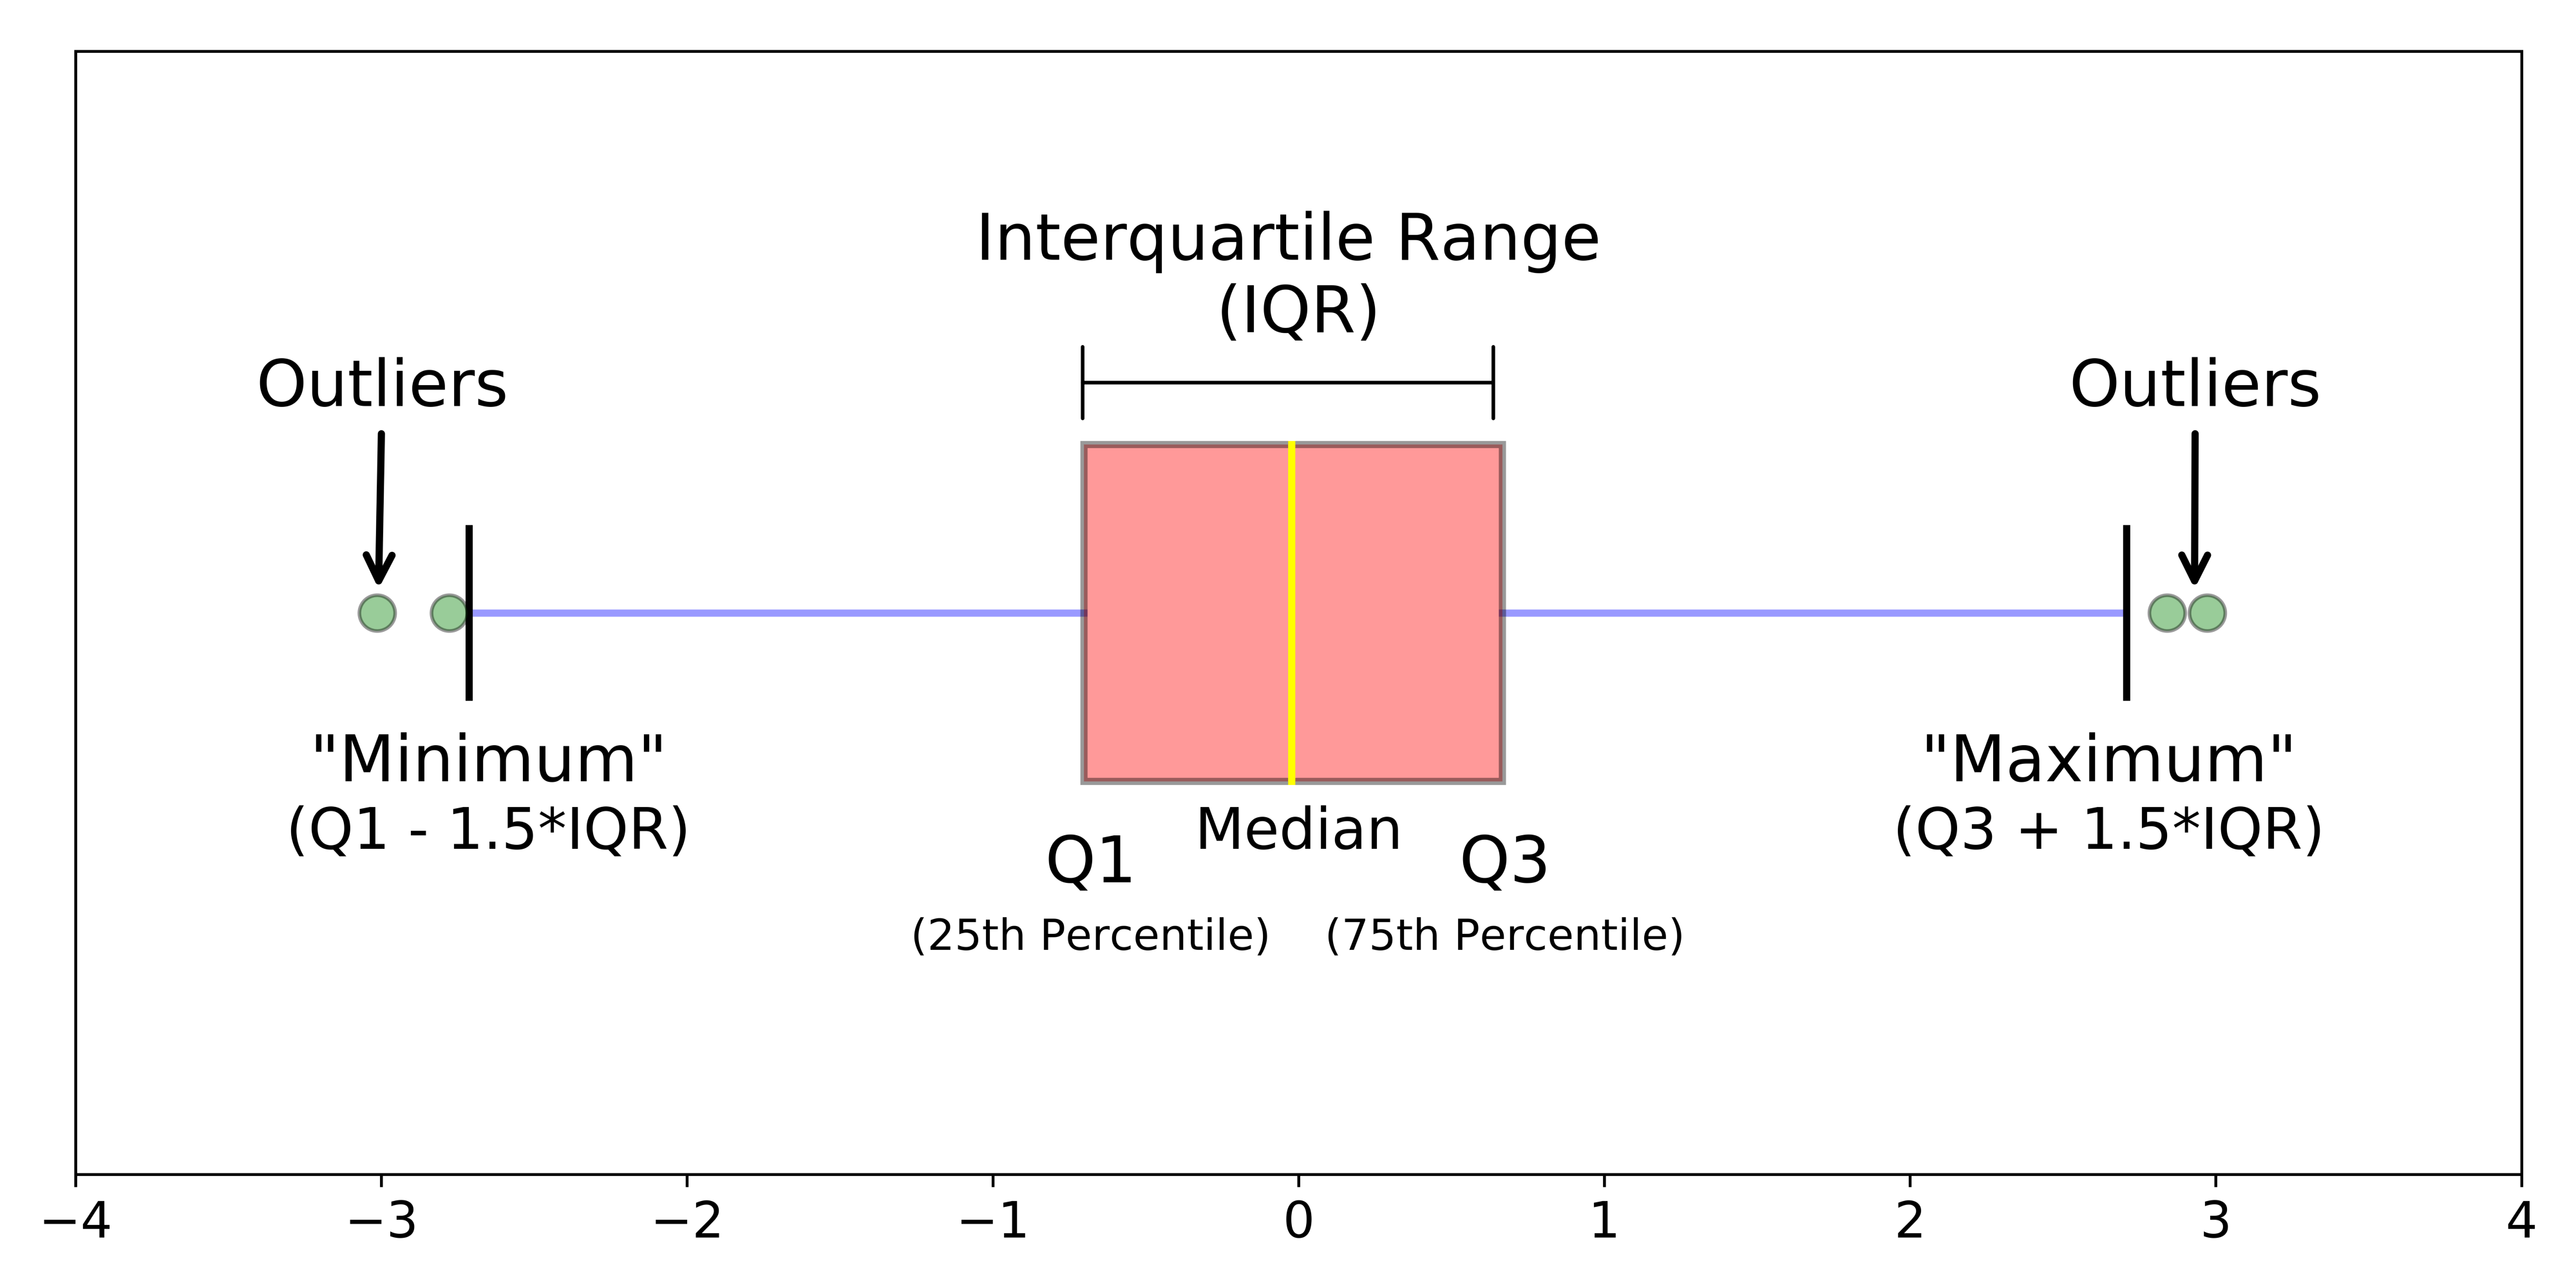

Para isso, vamos usar a biblioteca Seaborn.

Importando a biblioteca:

In [165]:
import seaborn as sns

sns.set()

Plotando o gráfico:

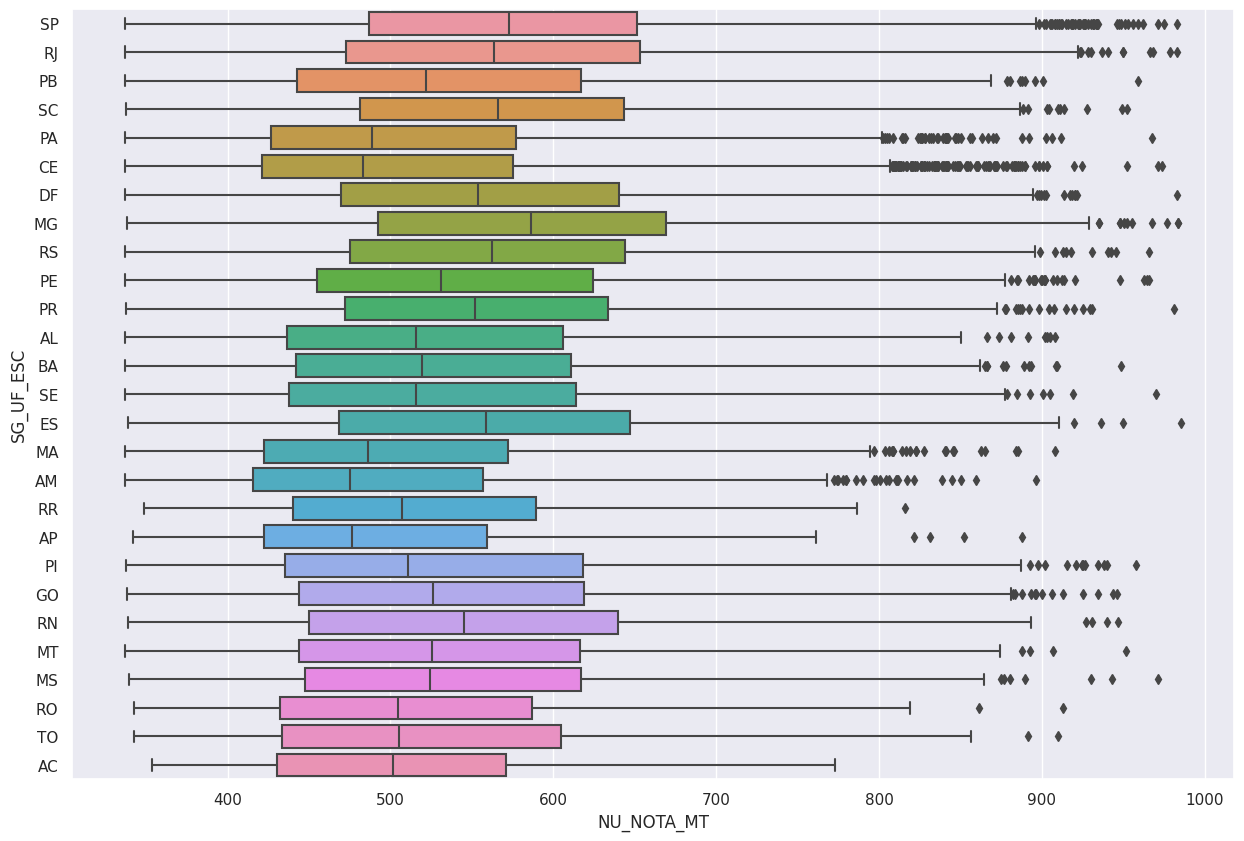

In [166]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data = dados.query('NU_NOTA_MT > 0'), x='NU_NOTA_MT', y='SG_UF_ESC')

Já temos muitas informações legais, mas ainda está difícil comparar o desempenho dos estados.

Para melhorar nossa visualização, vamos ordenar o gráfico pelas medianas.

Primeiro, criaremos uma lista com os índices (nomes dos estados) ordenados por seus valores de mediana, do maior para o menor:

In [163]:
indices_ordenados = dados.groupby('SG_UF_ESC')['NU_NOTA_MT'].median().sort_values(ascending=False).index


Agora, acrescentaremos o parâmetro 'order' na função boxplot para ordenar a visualização de acordo com esses dados:

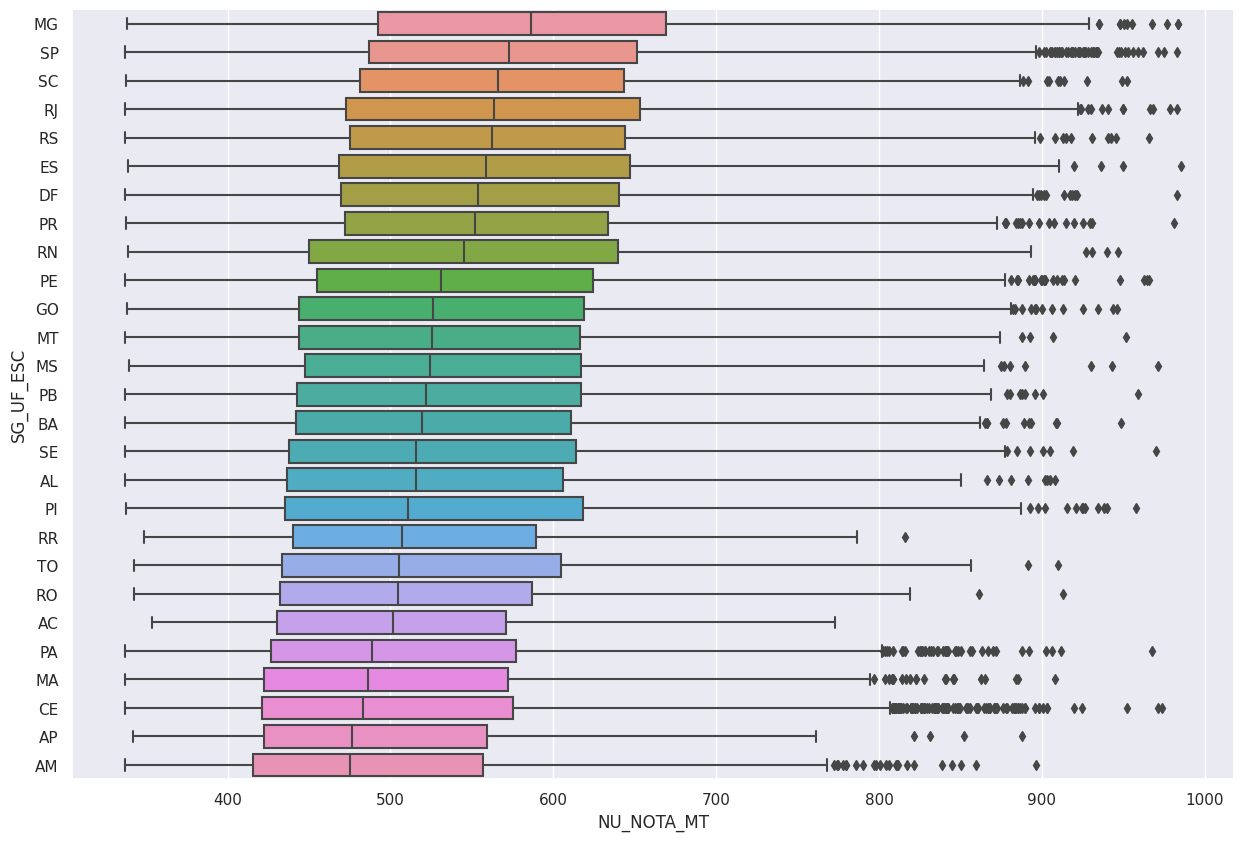

In [167]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data = dados.query('NU_NOTA_MT > 0'), x='NU_NOTA_MT', y='SG_UF_ESC', order= indices_ordenados)

## Notas de Matemática por Tipo de Escola (TP_ESCOLA_COMP)

Podemos utilizar o mesmo caminho para extrair essas informações:

In [169]:
dados.groupby('TP_ESCOLA_COMP')['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_ESCOLA_COMP,,,,,,,,
Não respondeu,200404.0,546.574857,118.103665,0.0,451.4,535.0,627.4,985.7
Privada,28288.0,615.581342,118.549747,0.0,531.8,621.6,695.3,985.7
Pública,110444.0,515.694821,101.207138,0.0,434.9,503.1,586.9,983.9


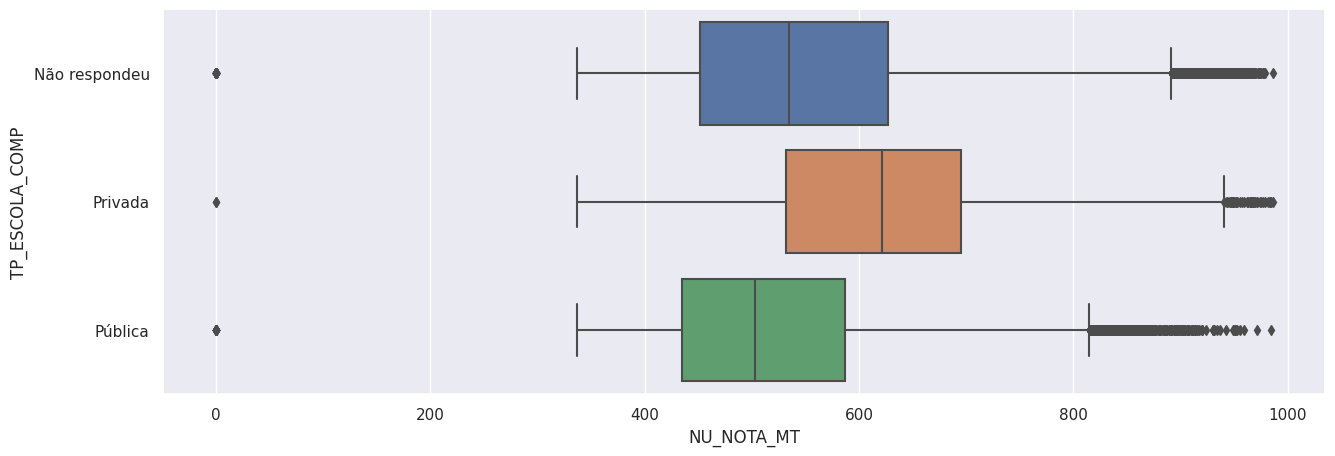

In [171]:
ax = plt.figure(figsize=(15,5))
ax = sns.boxplot(data = dados, x='NU_NOTA_MT', y='TP_ESCOLA_COMP')

## Notas de Matemática por Renda Mensal da Família (Q006)

Mesmos procedimentos realizados anteriormente. Entretanto, como é um campo codificado, precisamos criar outra coluna em nosso DataFrame para facilitar nossa analise (procedimento usando map() e dicionarios):

In [183]:
dict_renda = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.100,00',
    'C': 'De R$ 1.100,01 até R\$ 1.650,00',
    'D': 'De R$ 1.650,01 até R$ 2.200,00',
    'E': 'De R$ 2.200,01 até R$ 2.750,00',
    'F': 'De R$ 2.750,01 até R$ 3.300,00',
    'G': 'De R$ 3.300,01 até R$ 4.400,00',
    'H': 'De R$ 4.400,01 até R$ 5.500,00',
    'I': 'De R$ 5.500,01 até R$ 6.600,00',
    'J': 'De R$ 6.600,01 até R$ 7.700,00',
    'K': 'De R$ 7.700,01 até R$ 8.800,00',
    'L': 'De R$ 8.800,01 até R$ 9.900,00',
    'M': 'De R$ 9.900,01 até R$ 11.000,00',
    'N': 'De R$ 11.000,01 até R$ 13.200,00',
    'O': 'De R$ 13.200,01 até R$ 16.500,00',
    'P': 'De R$ 16.500,01 até R$ 22.000,00',
    'Q': 'Acima de R$ 22.000,00',
}

dict_renda_num = {
    'A': 0,
    'B': 1100,
    'C': 1650,
    'D': 2200,
    'E': 2750,
    'F': 3300,
    'G': 4400,
    'H': 5500,
    'I': 6600,
    'J': 7700,
    'K': 8800,
    'L': 9900,
    'M': 11000,
    'N': 13200,
    'O': 16500,
    'P': 22000,
    'Q': 30000,
}


In [179]:
dados['Q006_COMP'] = dados['Q006'].map(dict_renda)
dados['Q006_NUM'] = dados['Q006'].map(dict_renda_num)

Gerando estatísticas descritivas com o describe()

In [180]:
dados.groupby('Q006_COMP')['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
Q006_COMP,,,,,,,,
"Acima de R$ 22.000,00",5777.0,669.832075,122.667989,338.2,592.800,675.70,755.900,983.9
"Até R$ 1.100,00",91094.0,491.469270,92.475555,0.0,419.400,475.70,552.400,955.2
"De R$ 1.100,01 até R$ 1.650,00",53294.0,520.992526,99.450881,0.0,442.000,510.70,590.400,970.1
"De R$ 1.650,01 até R$ 2.200,00",40249.0,536.121578,103.979055,0.0,454.000,529.50,608.800,959.1
"De R$ 11.000,01 até R$ 13.200,00",4092.0,641.581207,121.976783,0.0,560.700,645.85,726.125,971.5
"De R$ 13.200,01 até R$ 16.500,00",4636.0,648.100388,122.800352,0.0,569.200,655.10,728.825,985.7
"De R$ 16.500,01 até R$ 22.000,00",4268.0,658.577390,122.914334,0.0,582.500,665.80,742.625,967.4
"De R$ 2.200,01 até R$ 2.750,00",27969.0,551.941142,107.163902,0.0,468.500,548.80,626.500,975.0
"De R$ 2.750,01 até R$ 3.300,00",16634.0,569.122111,110.045633,0.0,483.900,569.10,646.900,968.0


Plotando o boxplot ordenado pela mediana:

In [181]:
indices_ordenados = dados.groupby('Q006_COMP')['NU_NOTA_MT'].median().sort_values(ascending=False).index

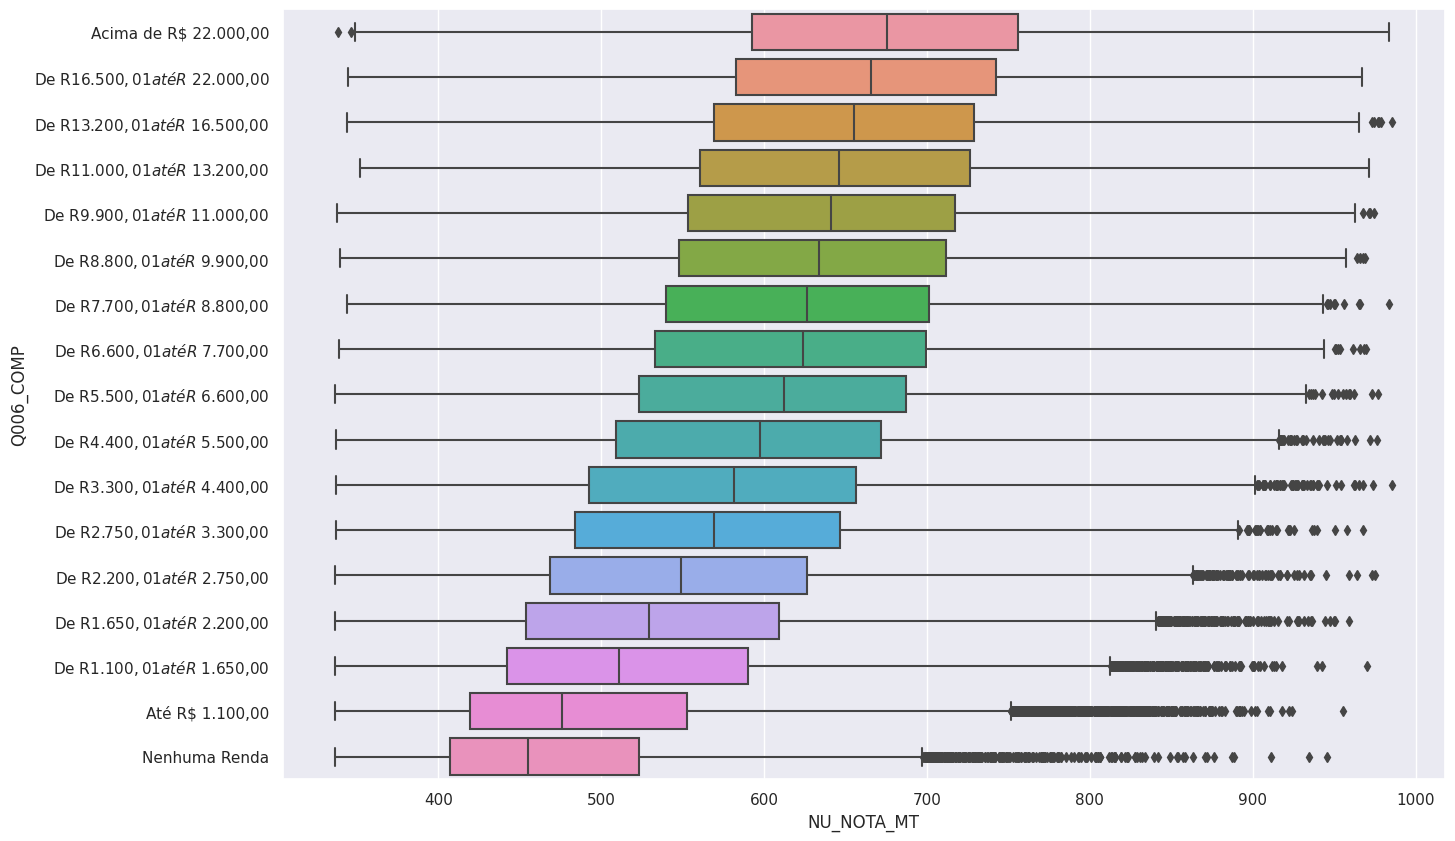

In [186]:
plt.figure(figsize=(15,10))
sns.boxplot(data = dados.query('NU_NOTA_MT > 0'), x='NU_NOTA_MT', y='Q006_COMP', order= indices_ordenados)
plt.show()

## Notas de Matemática por quem tem ou não computador em casa (Q025)

Assim como no caso do treineiro, podemos rotular informações direto no gráfico:

In [197]:
dados['Q025'].unique()

array(['B', 'A'], dtype=object)

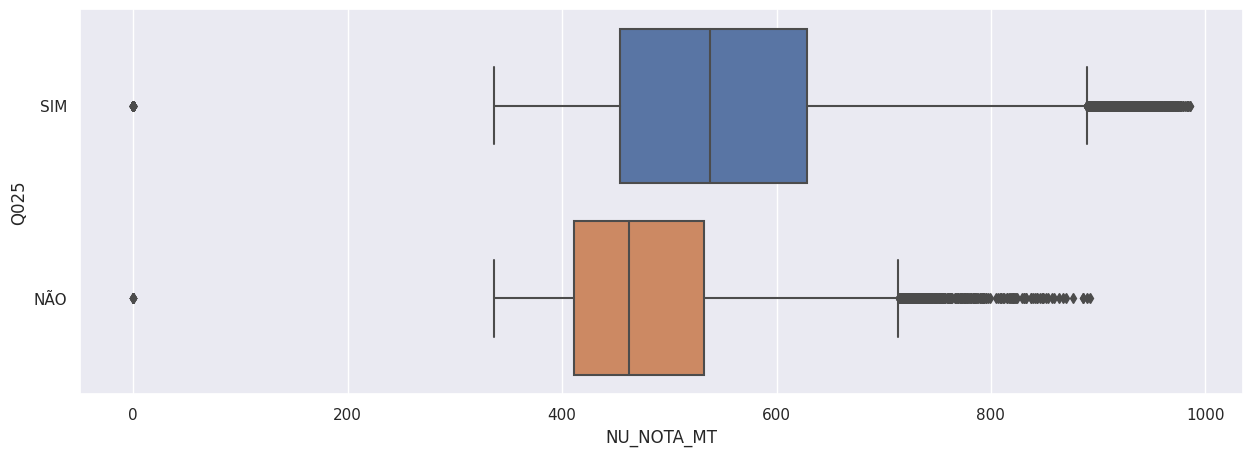

In [196]:
plt.figure(figsize=(15,5))
sns.boxplot(data = dados, x='NU_NOTA_MT', y='Q025')
plt.yticks([0, 1], ['SIM', 'NÃO'])
plt.show()

# Predição simples.

Nosso objetivo é tentar realizar uma previsão simples da nota de um aluno em Matemática ('NU_NOTA_MT') com base em suas outras notas e quaisquer outras informações relevantes de nosso dataset. 

Assim, esse é um problema de regressão:

> Um problema de regressão refere-se a um tipo de tarefa de aprendizado de máquina em que o objetivo é prever um valor contínuo ou quantitativo com base em um conjunto de variáveis de entrada. A regressão busca estabelecer uma relação funcional entre os atributos de entrada e a variável de saída, permitindo fazer previsões numéricas.

Nosso objetivo não é criar um preditor ótimo (por conta do tempo), mas sim mostrar o processo para se construir um preditor bastante simples. 

Para isso, iremos: 

* Excluir de nossa avaliação registros que de alunos que não possuam nota em Matemática.
* Identificar quais colunas de nosso DataFrame podem nos auxiliar a prever este valor. 
* Treinar um modelo de Machine Learning
* Implementar o modelo em uma GUI simples




## Remover alunos sem nota de matemática.

Não faz sentido mantermos no nosso dataset registros de alunos que faltaram na prova de matemática, ou não a realizaram por qualquer motivo:


In [202]:
sum(dados['NU_NOTA_MT'].isna())

160864

Uma forma simples de excluir esses dados é utilizando a função dropna(), e utilizar o parâmetro "subset" para definir quais colunas considerar:

In [207]:
dados.dropna(subset= ['NU_NOTA_MT'], inplace=True)

In [208]:
sum(dados['NU_NOTA_MT'].isna())

0

Além disso, não podemos utilizar quaisquer valores que NaN ou Null em modelos de Machine Learning (na maioria dos casos). Então, vamos acabar retirando todas as linhas que possuem valores nulos, independente da coluna:

In [225]:
dados.dropna(inplace=True)
len(dados)

98306

## Identificar colunas eficientes em explicar a nota de matemática

Antes de iniciar a verificação, vamos converter alguns dados qualitativos em numéricos para que possamos avaliar a relação entre essas variáveis (Código já disponibilizado por conta do tempo, mas é o mesmo esquema de conversão utilizando .map()):

> O ideal seria realizar a conversão de variáveis categóricas para numéricas para TODAS as colunas.. Mas, por questão de tempo, vamos chutar que as informações socio-econômicas já nos auxiliam o suficiente. 

In [226]:
# Convertendo Q001 e Q002 - estudos dos pais

dict_estudo_pais = {
    'A': 'Nunca estudou',
    'B': 'Não completou 4a serie/5o ano do Ensino Fundamental',
    'C': 'Completou 4a serie/5o ano, mas não completou a 8a serie/9o ano do Ensino Fundamental',
    'D': 'Completou a 8a serie/9o ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou Pós-Graduação',
    'G': 'Completou a Pós-Graduação.',
    'H': 'Não sei',
}

dict_estudo_pais_num = {
    'A': 0,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 1, 
}

dados['Q001_COMP'] = dados['Q001'].map(dict_estudo_pais)
dados['Q001_NUM'] = dados['Q001'].map(dict_estudo_pais_num)

dados['Q002_COMP'] = dados['Q002'].map(dict_estudo_pais)
dados['Q002_NUM'] = dados['Q002'].map(dict_estudo_pais_num)

In [227]:
# Convertendo todas as Q0XX que possuem 5 opções (da Q008 a Q025, menos 18, 20, 21 e 23)
dict_tem_itens = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4, #ou mais
}

for i in range(8,25):
    if i in [18, 20, 21, 23]: continue
    elif i<10:
        dados[f'Q00{i}_NUM'] = dados[f'Q00{i}'].map(dict_tem_itens)
    else:
        dados[f'Q0{i}_NUM'] = dados[f'Q0{i}'].map(dict_tem_itens)

dados['Q025_NUM'] = dados['Q025'].map({'A':0, 'B':1})

dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q012_NUM,Q013_NUM,Q014_NUM,Q015_NUM,Q016_NUM,Q017_NUM,Q019_NUM,Q022_NUM,Q024_NUM,Q025_NUM
2,210055944093,2022,2,M,1,1,1,2,0,3,...,1,0,1,0,1,0,2,4,1,1
3,210057529343,2022,2,M,1,1,1,2,0,3,...,2,0,1,0,1,0,2,4,1,1
9,210055692582,2022,2,F,1,1,1,2,0,3,...,1,1,0,0,1,0,1,2,2,1
11,210055454458,2022,3,F,1,1,1,2,0,2,...,2,1,1,0,1,0,1,2,1,1
12,210054664066,2022,2,F,1,2,1,2,0,2,...,1,0,0,0,0,0,1,2,1,1


Com (alguns) dados convertidos para valores numéricos, podemos iniciar a avaliação de influência das colunas numéricas sobre a nota de matemática.

Uma forma de avaliar isso, é por meio do coeficiente de correlação.

Nessa métrica, os resultados variam de -1 até 1, e significam:

* 1 - Dados totalmente correlatos (se um sobe, o outro também, em igual proporção)
* 0 - Dados não correlatos (sem relação alguma)
* -1 Dados inversamente correlatos (se um sobe, o outro desce em igual proporção).

Assim, as colunas que nos interessam vão ter os valores mais próximos de 1 ou -1. Valores próximos de 0 podem ser considerados "ruídos", e atrapalhar a predição.

> Notem: essa é apenas 1 abordagem bem simples de avaliação. Há várias outras formas de definir quais colunas são importantes para o modelo, como avaliação gráfica com relplot (seaborn), uso de métodos de redução de dimensionalidade, como PCA, etc.. 

In [228]:
dados.corr(numeric_only=True)['NU_NOTA_MT'].sort_values(ascending=False)

NU_NOTA_MT                1.000000
NU_NOTA_CH                0.635406
NU_NOTA_CN                0.613608
NU_NOTA_LC                0.603257
NU_NOTA_REDACAO           0.502622
NU_NOTA_COMP5             0.476771
NU_NOTA_COMP3             0.459335
NU_NOTA_COMP4             0.459074
NU_NOTA_COMP1             0.446278
NU_NOTA_COMP2             0.433007
Q024_NUM                  0.402856
Q006_NUM                  0.391675
TP_ESCOLA                 0.363404
Q008_NUM                  0.344867
Q001_NUM                  0.338716
Q002_NUM                  0.328792
TP_DEPENDENCIA_ADM_ESC    0.321511
Q010_NUM                  0.312957
Q019_NUM                  0.291137
Q013_NUM                  0.247664
Q016_NUM                  0.245689
Q014_NUM                  0.227664
Q022_NUM                  0.224921
Q009_NUM                  0.214485
Q025_NUM                  0.165747
Q017_NUM                  0.162178
CO_MUNICIPIO_PROVA        0.134162
CO_MUNICIPIO_ESC          0.133955
CO_UF_PROVA         

Assim, vamos considerar as 10 melhores colunas:

* Notas nas outras provas
* Nota na redação (retiramos os componentes da nota da redação)
* Respostas do questionário:
  * Tem computador na residência? (Q024)
  * Renda mensal da família (Q006)
  * Número de banheiros na residência (Q008)
  * Escolaridade do pai (Q001)
  * Escolaridade da mãe (Q002)
  * Número de carros na residência (Q010) 

TP_DEPENDENCIA_ADM_ESC parece auxiliar, mas os dados são categóricos e estão numéricamente ordenados. Então, é uma coincidência. Vamos retirar este campo também.

Selecionando somente essas colunas:

In [229]:
melhores_colunas = ['NU_NOTA_CN',
                    'NU_NOTA_LC',
                    'NU_NOTA_CH',
                    'NU_NOTA_REDACAO',
                    'Q024_NUM',
                    'Q006_NUM',
                    'Q008_NUM',
                    'Q001_NUM',
                    'Q002_NUM',
                    'Q010_NUM',
                    'NU_NOTA_MT']


In [230]:
dados_selecionados = dados[melhores_colunas]

## Treinar um modelo de Machine Learning

Aqui, o objetivo não é entender o funcionamento de algoritmos de machine learning, nem mesmo gerar uma resposta ótima para o problema.

Nosso objetivo é criar um preditor razoável, e ilustrar os passos para sua construção, que são:

* Separação dos dados selecionados em dois grupos: treino e teste
* Utilização dos dados para treinar um modelo de ML
* Teste dos resultados obtidos




### Separação em treino e teste

Vamos utilizar a biblioteca scikit-learn, que é uma ferramenta de aprendizado de máquina em Python que oferece uma ampla gama de algoritmos e funcionalidades para tarefas de classificação, regressão, agrupamento, pré-processamento de dados e avaliação de modelos.

Primeiro, separamos nossos dados_selecionados em 2 variáveis X (variáveis independentes, quem vai ajudar a prever) e y (variável dependente, quem queremos prever).

Pra isso, vamos usar a função .drop(), e selecionar o y diretamente pela coluna:

In [262]:
X = dados_selecionados.drop('NU_NOTA_MT', axis=1).copy()
y = dados_selecionados['NU_NOTA_MT'].copy()

Agora, podemos dividir em treino e teste:

In [263]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, shuffle=True, test_size=0.7, random_state=42)

### Treinamento do modelo:

Com os dados separados, vamos treinar um modelo. Utilizaremos o Random Forest:

In [264]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=10)

Com o modelo importado e carregado, na variável rf, podemos treiná-lo com o método fit(), passando como parametro o X_treino e y_treino:

In [265]:
modelo.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=10)

Com o modelo treinado, podemos gerar previsões com o método "predict()"

In [266]:
y_treino_previsto = modelo.predict(X_treino)

y_teste_previsto = modelo.predict(X_teste)


### Testando o modelo:

Com o modelo já treinado, vamos testar sua eficiência. Para isso, vamos utilizar 2 métricas:

* R2 Score - Quanto mais perto de 1, melhor.
* RMSE - Raiz do erro quadrático médio - Quanto menor, melhor (métrica na mesma "medida" que a nota que estamos prevendo)

Também usando o sklearn:

In [267]:
from sklearn import metrics

Calculando o R2 Score do modelo com os dados de **treino**:

In [268]:
metrics.r2_score(y_treino,y_treino_previsto)

0.647130957538697

Calculando o RMSE do modelo com os dados de **treino**:

In [269]:
metrics.mean_squared_error(y_treino,y_treino_previsto, squared= False)

68.56061926522806

Calculando o R2 Score do modelo com os dados de **teste**:

In [270]:
metrics.r2_score(y_teste,y_teste_previsto)

0.5534891281392385

Calculando o RMSE do modelo com os dados de **teste**:

In [271]:
metrics.mean_squared_error(y_teste,y_teste_previsto, squared= False)

77.59516302991281

## Aplicando o modelo em uma GUI simples


In [286]:
def converte_valores_categoricos(entrada):
    dict_estudo_pais = {
        'Nunca estudou' : 0,
        'Não completou 4a serie/5o ano do Ensino Fundamental' : 2,
        'Completou 4a serie/5o ano, mas não completou a 8a serie/9o ano do Ensino Fundamental' : 3,
        'Completou a 8a serie/9o ano do Ensino Fundamental, mas não completou o Ensino Médio' : 4,
        'Completou o Ensino Médio, mas não completou a Faculdade' : 5,
        'Completou a Faculdade, mas não completou Pós-Graduação' : 6,
        'Completou a Pós-Graduação.' : 7,
        'Não sei' : 1,
    }
    
    dict_renda = {
        'Nenhuma Renda' : 0,
        'Até R$ 1.100,00' : 1100,
        'De R$ 1.100,01 até R$ 1.650,00' : 1650,
        'De R$ 1.650,01 até R$ 2.200,00' : 2200,
        'De R$ 2.200,01 até R$ 2.750,00' : 2750,
        'De R$ 2.750,01 até R$ 3.300,00' : 3300,
        'De R$ 3.300,01 até R$ 4.400,00' : 4400,
        'De R$ 4.400,01 até R$ 5.500,00' : 5500,
        'De R$ 5.500,01 até R$ 6.600,00' : 6600,
        'De R$ 6.600,01 até R$ 7.700,00' : 7700,
        'De R$ 7.700,01 até R$ 8.800,00' : 8800,
        'De R$ 8.800,01 até R$ 9.900,00' : 9900,
        'De R$ 9.900,01 até R$ 11.000,00' : 11000,
        'De R$ 11.000,01 até R$ 13.200,00' : 13200,
        'De R$ 13.200,01 até R$ 16.500,00' : 16500,
        'De R$ 16.500,01 até R$ 22.000,00' : 22000,
        'Acima de R$ 22.000,00' : 30000,
    }

    entrada['Q001_NUM'] = entrada['Q001_NUM'].map(dict_estudo_pais)
    entrada['Q002_NUM'] = entrada['Q002_NUM'].map(dict_estudo_pais)
    
    entrada['Q006_NUM'] = entrada['Q006_NUM'].map(dict_renda)

In [288]:
def prever_nota_mat(entrada):
  
  converte_valores_categoricos(entrada)

  return modelo.predict(entrada)
    

In [289]:
# Configuring the window with ipywidgets and IPython.display

from ipywidgets import widgets, HBox, VBox, Layout
from IPython.display import display

# Creating form controls

# nota_cn = widgets.Dropdown(options=step1.manufacturer.unique(), description='Manufacturer')

nota_cn = widgets.Text( description='Nota Ciências Naturais', style= {'description_width': 'initial'})
nota_lc = widgets.Text(description="Nota Linguagens e Códigos", style= {'description_width': 'initial'})
nota_ch = widgets.Text(description="Nota Ciências Humanas", style= {'description_width': 'initial'})
nota_redacao = widgets.Text(description="Nota Redação", style= {'description_width': 'initial'})

n_computador = widgets.Dropdown(options=sorted(dados.Q024_NUM.unique()), description='# Computadores (Q024)', style= {'description_width': 'initial'})
renda_familia = widgets.Dropdown(options=sorted(dados.Q006_COMP.unique()), description="Renda Familiar (Q006)", style= {'description_width': 'initial'})
n_banheiros = widgets.Dropdown(options=sorted(dados.Q008_NUM.unique()), description="# Banheiros (Q008)", style= {'description_width': 'initial'})
n_carro = widgets.Dropdown(options=sorted(dados.Q010_NUM.unique()), description="# Carros (Q010)", style= {'description_width': 'initial'})
estudos_pai = widgets.Dropdown(options=sorted(dados.Q001_COMP.unique()), description="Estudos Pai (Q001)", style= {'description_width': 'initial'})
estudos_mae = widgets.Dropdown(options=sorted(dados.Q002_COMP.unique()), description="Estudos Mãe (Q002)", style= {'description_width': 'initial'})

button = widgets.Button(description="Prever")

# Positioning the controls
title = widgets.HTML('<h2>Estimador de Nota de Matemática:</h2>')
left = VBox([nota_cn, nota_lc, nota_ch, nota_redacao])
right = VBox([n_computador, n_banheiros, n_carro, renda_familia, estudos_pai, estudos_mae])
inputs = HBox([left, right])

# Prediction function
def simulator(sender):
    input_dados = pd.DataFrame([[
                           nota_cn.value if nota_cn.value else 0, 
                           nota_lc.value if nota_lc.value else 0,
                           nota_ch.value if nota_ch.value else 0,
                           nota_redacao.value if nota_redacao.value else 0,                    
                           int(n_computador.value if n_computador.value else 0),
                           renda_familia.value if renda_familia.value else 0,
                           int(n_banheiros.value if n_banheiros.value else 0),
                           estudos_pai.value if estudos_pai.value else 0,
                           estudos_mae.value if estudos_mae.value else 0,
                           int(n_carro.value if n_carro.value else 0)
                           ]], columns=['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 
                                         'Q024_NUM', 'Q006_NUM', 'Q008_NUM', 
                                         'Q001_NUM', 'Q002_NUM', 'Q010_NUM'])

#     prever_nota_mat(input_dados)
    print(f'\n -> Nota de matematica: {prever_nota_mat(input_dados)[0]} \n')
    
    
# Atribuir a função  "simulator" ao evento de clicar o botão
button.on_click(simulator)  

In [293]:
# Mostra a GUI

display(title, inputs, button)

HTML(value='<h2>Estimador de Nota de Matemática:</h2>')

Button(description='Prever', style=ButtonStyle())

In [292]:
# Para testar manualmente, comparando com o resultado do preditor..
# substituir o valor de i:

i = 1
print(X.iloc[i])
print()
print('y_teste: ', y_teste.iloc[i])

NU_NOTA_CN          532.6
NU_NOTA_LC          587.1
NU_NOTA_CH          643.8
NU_NOTA_REDACAO     860.0
Q024_NUM              1.0
Q006_NUM           4400.0
Q008_NUM              2.0
Q001_NUM              7.0
Q002_NUM              5.0
Q010_NUM              1.0
Name: 3, dtype: float64

y_teste:  772.1
